importing libraries

In [15]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.decomposition import PCA

reading our data

In [2]:
df=pd.read_csv('m.csv')
print(df.columns)
df.head()

Index(['dd', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf',
       'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team', 'goalsminuspenalty', 'xgminusgf',
       'xgaminusga', 'TOTALGOALS', 'OVER2.5', 'GG', 'FAV1.5', 'POINTS', 'CS'],
      dtype='object')


,dd,date,time,comp,round,day,venue,result,gf,ga,...,team,goalsminuspenalty,xgminusgf,xgaminusga,TOTALGOALS,OVER2.5,GG,FAV1.5,POINTS,CS
0,1,8/15/2021,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,...,Manchester City,0,1.9,0.3,1,NO,NO,UNSAFE,0,0:1
1,2,8/21/2021,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,...,Manchester City,5,-2.3,0.1,5,YES,NO,UNSAFE,3,5:0
2,3,8/28/2021,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,...,Manchester City,5,-1.2,0.1,5,YES,NO,UNSAFE,3,5:0
3,4,9/11/2021,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,...,Manchester City,1,1.9,0.8,1,NO,NO,UNSAFE,3,1:0
4,6,9/18/2021,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,...,Manchester City,0,1.1,0.4,0,NO,NO,UNSAFE,1,0:0


Exploratory Data ANalysis

In [3]:
df['possOpponent']=df['poss'].apply(lambda x:100-x)
df.columns

Index(['dd', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf',
       'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team', 'goalsminuspenalty', 'xgminusgf',
       'xgaminusga', 'TOTALGOALS', 'OVER2.5', 'GG', 'FAV1.5', 'POINTS', 'CS',
       'possOpponent'],
      dtype='object')

In [5]:
cols=['team','xg','poss','venue','opponent','xga','possOpponent','result','pkatt','sot']
df1=DataFrame(df,columns=cols)
df1

,team,xg,poss,venue,opponent,xga,possOpponent,result,pkatt,sot
0,Manchester City,1.9,64,Away,Tottenham,1.3,36,L,0,4
1,Manchester City,2.7,67,Home,Norwich City,0.1,33,W,0,4
2,Manchester City,3.8,80,Home,Arsenal,0.1,20,W,0,10
3,Manchester City,2.9,61,Away,Leicester City,0.8,39,W,0,8
4,Manchester City,1.1,63,Home,Southampton,0.4,37,D,0,1
...,...,...,...,...,...,...,...,...,...,...
1384,Sheffield United,0.5,34,Away,Tottenham,2.0,66,L,0,1
1385,Sheffield United,0.7,50,Home,Crystal Palace,2.1,50,L,0,0
1386,Sheffield United,1.6,38,Away,Everton,1.3,62,W,0,3
1387,Sheffield United,0.8,50,Away,Newcastle Utd,1.5,50,L,0,1


In [6]:
df1.describe()

,xg,poss,xga,possOpponent,pkatt,sot
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,1.304176,49.702664,1.338445,50.297336,0.147588,4.041037
std,0.767268,12.401897,0.789360,12.401897,0.387804,2.403866
min,0.000000,18.000000,0.000000,18.000000,0.000000,0.000000
25%,0.700000,40.000000,0.700000,41.000000,0.000000,2.000000
50%,1.200000,50.000000,1.200000,50.000000,0.000000,4.000000
75%,1.800000,59.000000,1.800000,60.000000,0.000000,5.000000
max,4.600000,82.000000,5.000000,82.000000,3.000000,15.000000


In [7]:
df1.duplicated().sum()
df1.isna().sum()
df['pkatt'].sum()

205

In [8]:
s=Series(df1.dtypes)
s.values

array([dtype('O'), dtype('float64'), dtype('int64'), dtype('O'),
       dtype('O'), dtype('float64'), dtype('int64'), dtype('O'),
       dtype('int64'), dtype('int64')], dtype=object)

correlation between vars

In [9]:
c=[]
for x in df1.columns:
    if df1[x].dtypes!='O':
       c.append(x) 

,xg,poss,xga,possOpponent,pkatt,sot
xg,1.000000,0.375300,-0.302950,-0.375300,0.360882,0.649701
poss,0.375300,1.000000,-0.386014,-1.000000,0.024560,0.359112
xga,-0.302950,-0.386014,1.000000,0.386014,-0.069621,-0.243642
possOpponent,-0.375300,-1.000000,0.386014,1.000000,-0.024560,-0.359112
pkatt,0.360882,0.024560,-0.069621,-0.024560,1.000000,0.014365
sot,0.649701,0.359112,-0.243642,-0.359112,0.014365,1.000000


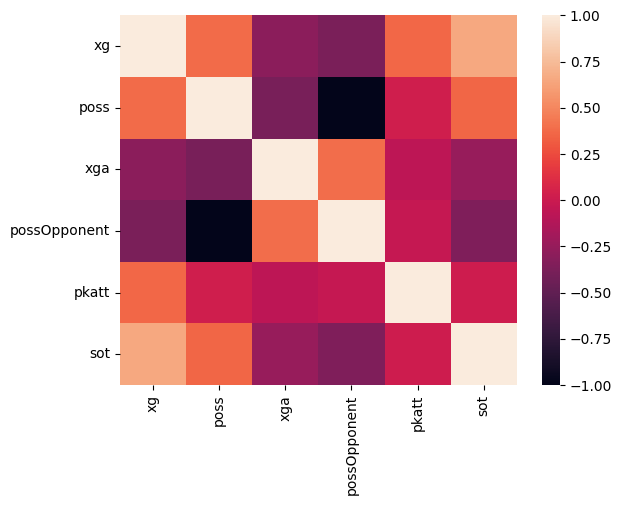

In [10]:
sns.heatmap(df1[c].corr())
df1[c].corr()

finding and handling outliers

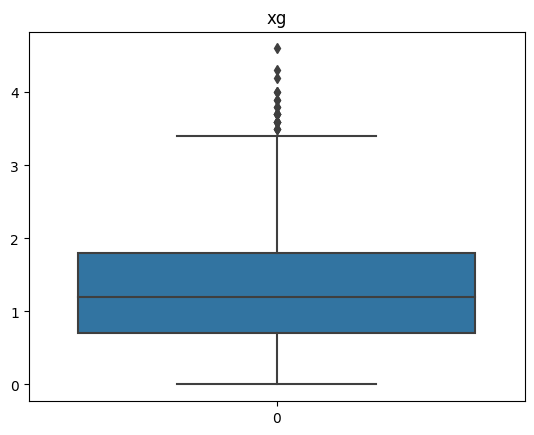

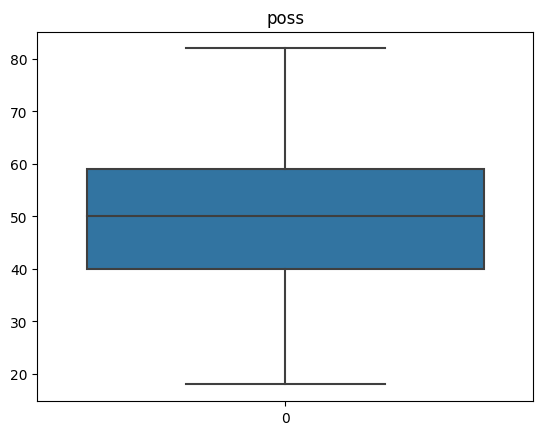

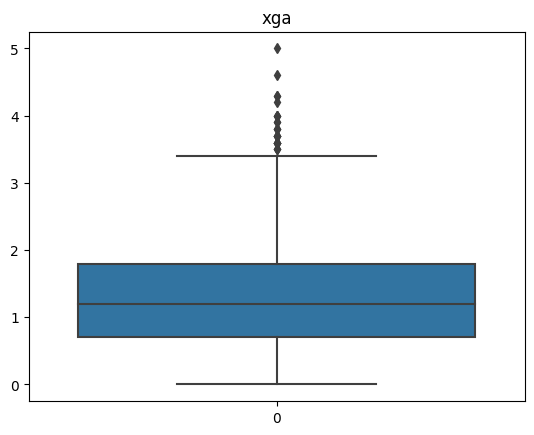

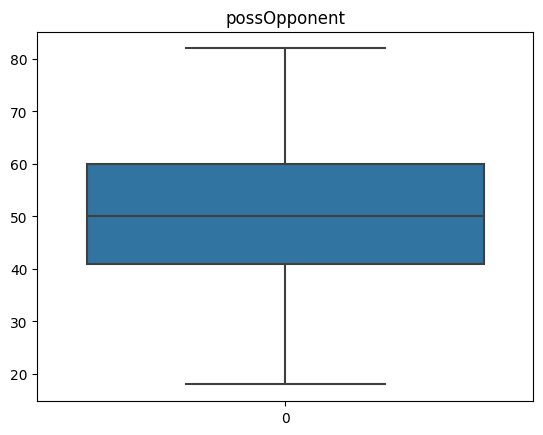

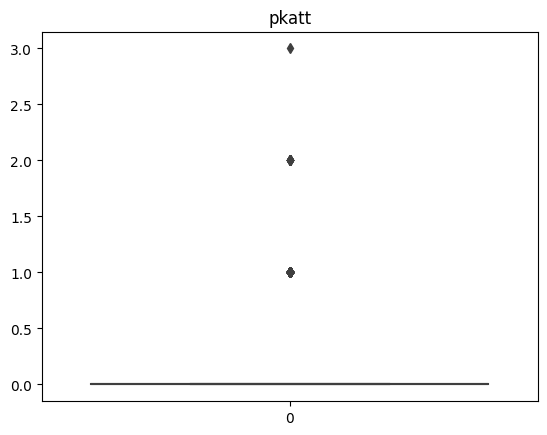

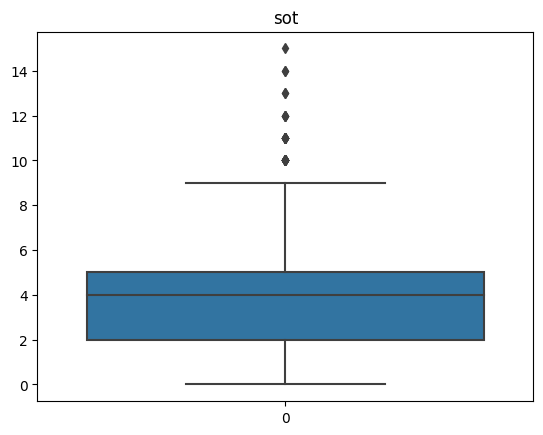

In [11]:
for x in df1.columns:
    if df1[x].dtypes!='O':
        sns.boxplot(df1[x])
        plt.title(x)
        plt.show()
    

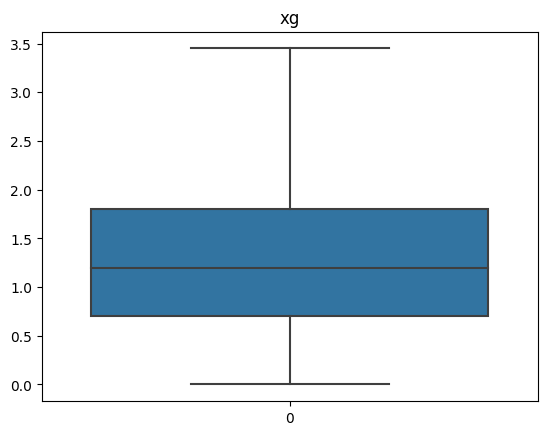

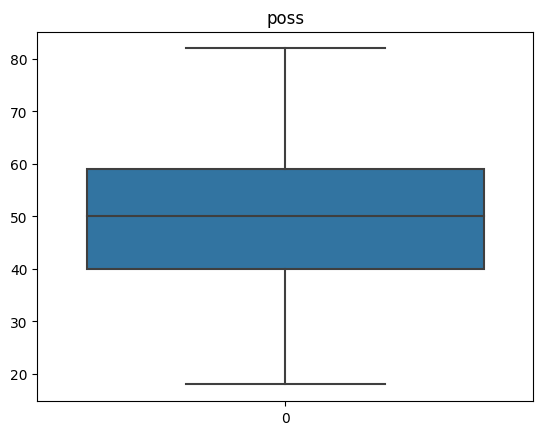

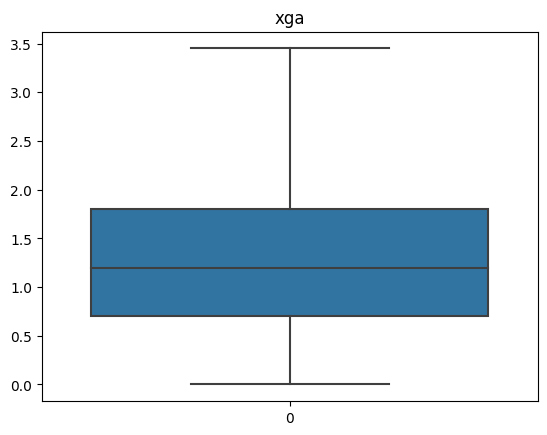

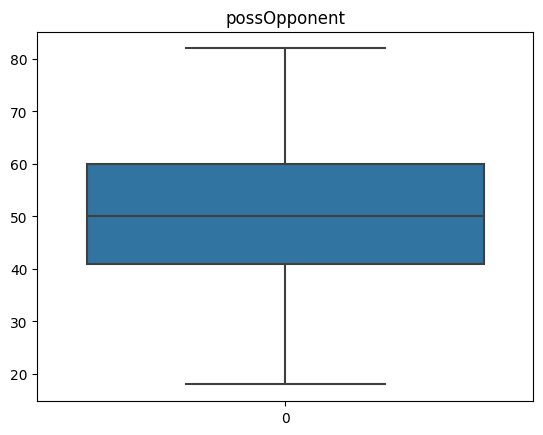

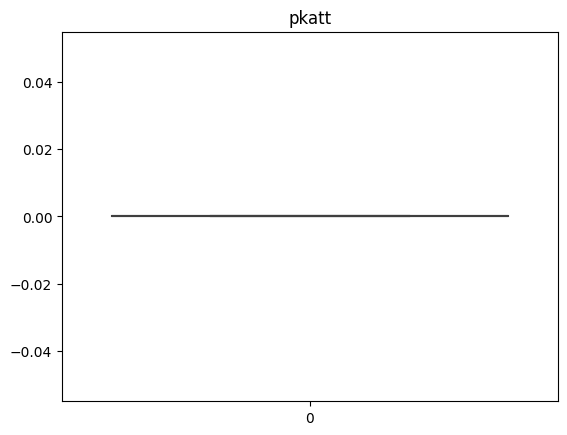

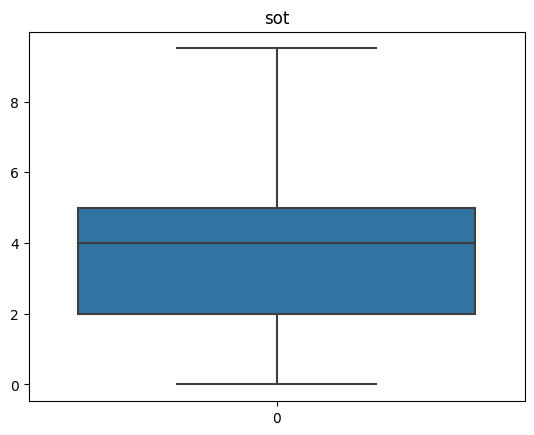

In [12]:
#HANDLE OUTLIERS WITH IQR
for x in c:
    if x=='pk':
        continue
    iqr=df1[x].quantile(0.75)-df1[x].quantile(0.25)
    higher_outlier=df1[x].quantile(0.75)+1.5*iqr
    lower_outlier=df1[x].quantile(0.25)-1.5*iqr
    df1.loc[df1[x]>=higher_outlier,x]=higher_outlier
    df1.loc[df1[x]<=lower_outlier,x]=lower_outlier
    sns.boxplot(df1[x])
    plt.title(x)
    plt.show()

scatterplots btwn vars

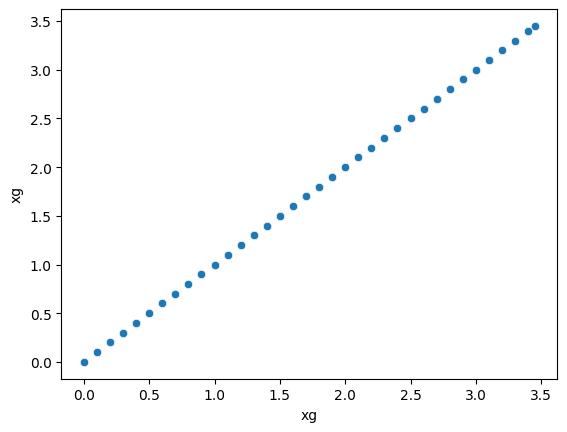

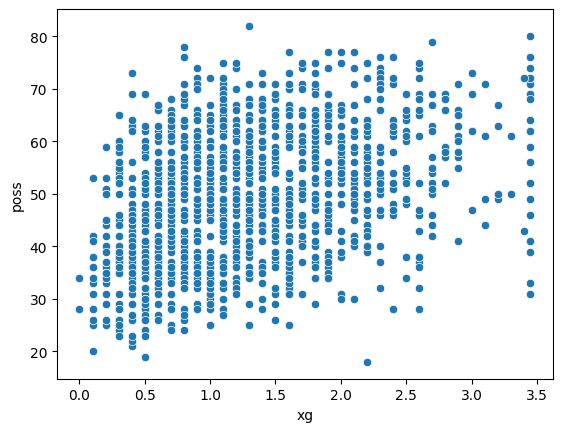

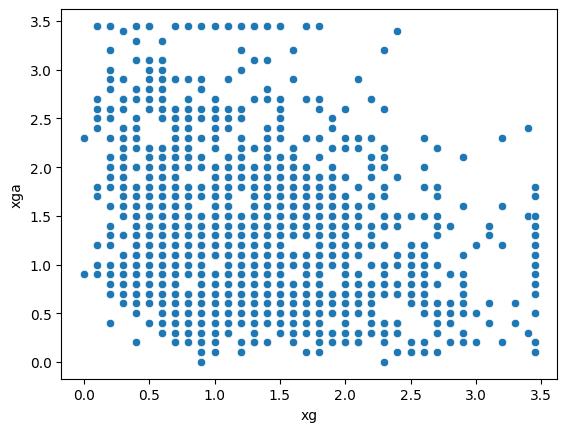

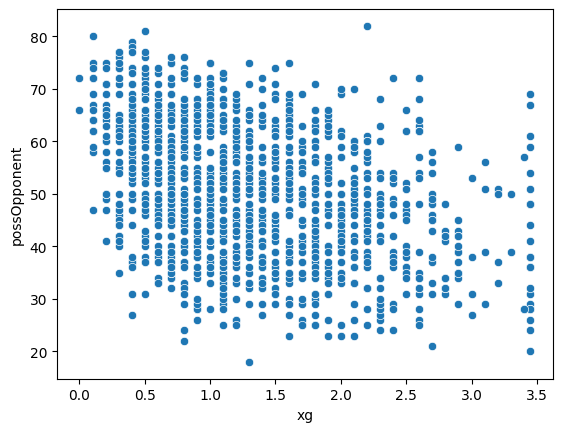

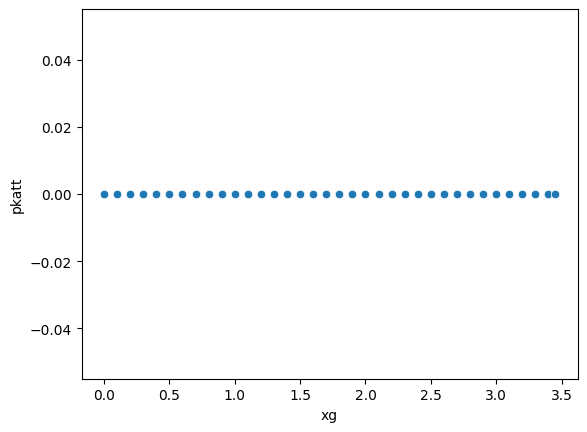

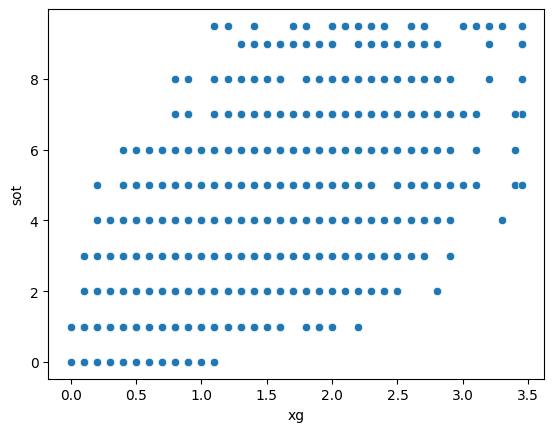

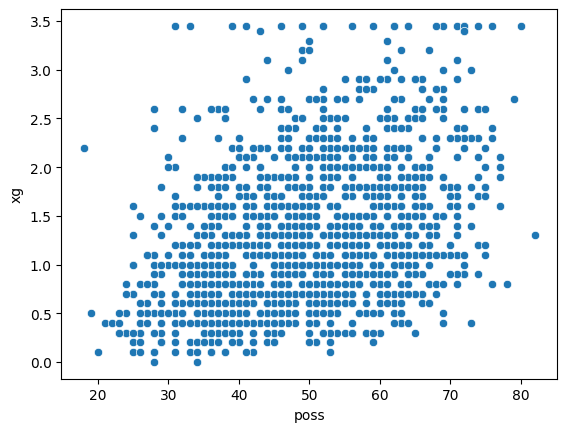

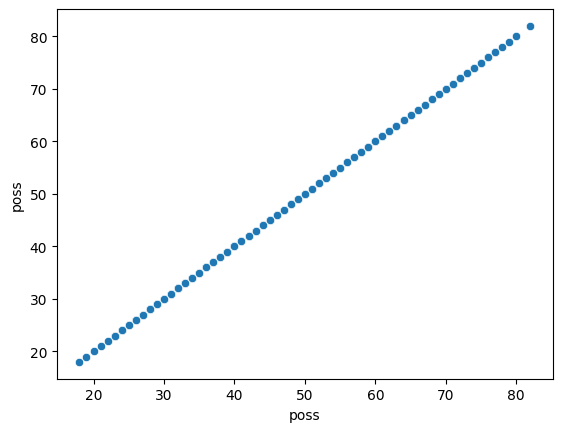

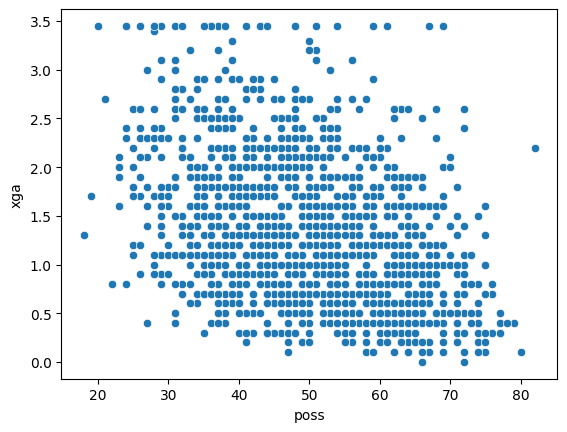

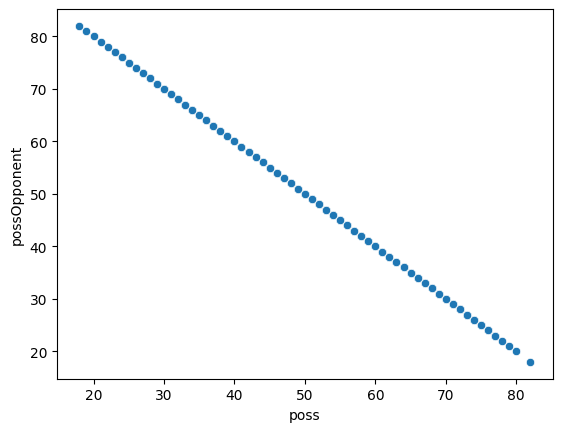

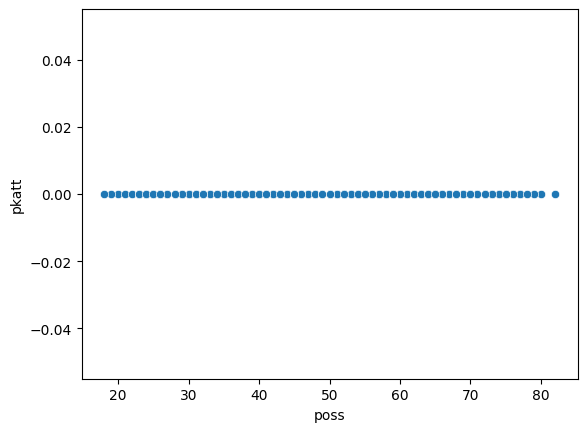

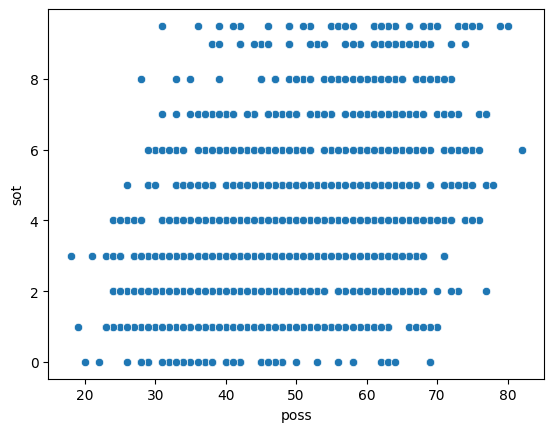

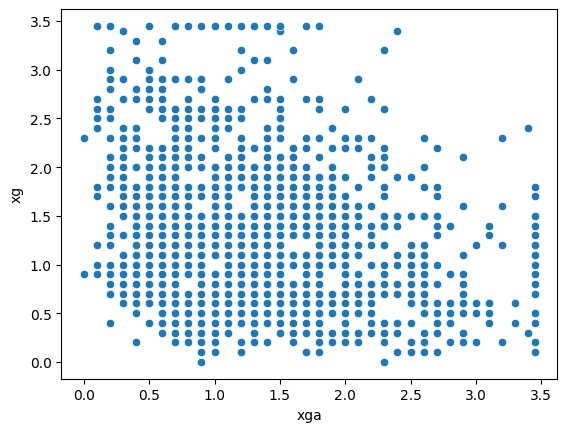

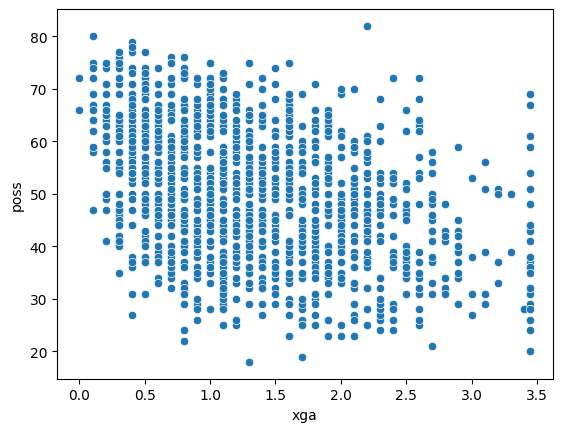

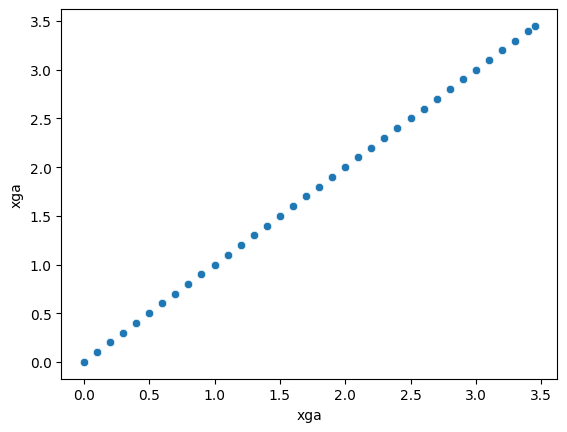

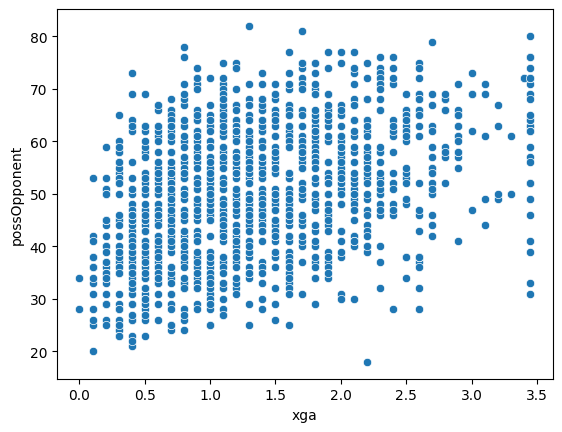

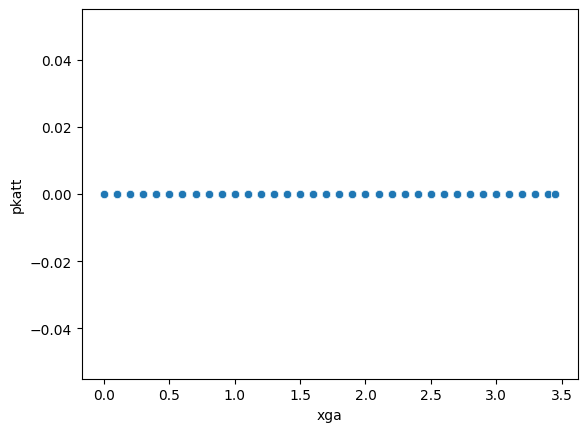

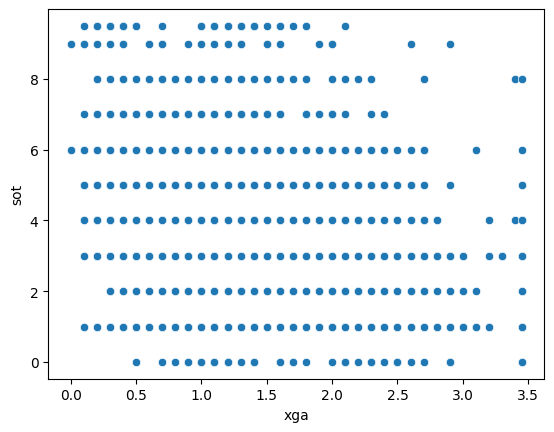

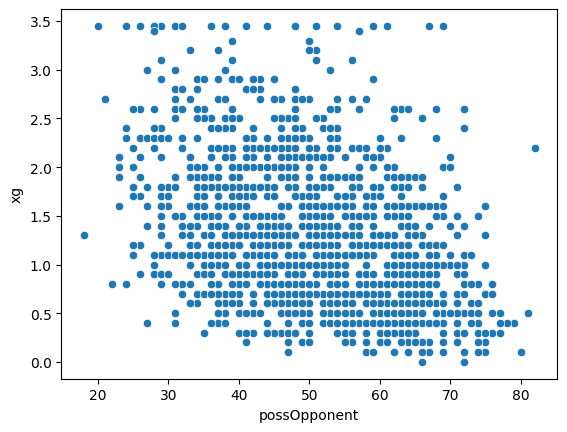

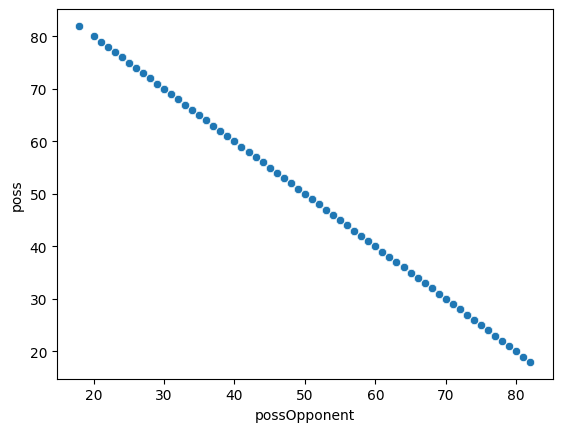

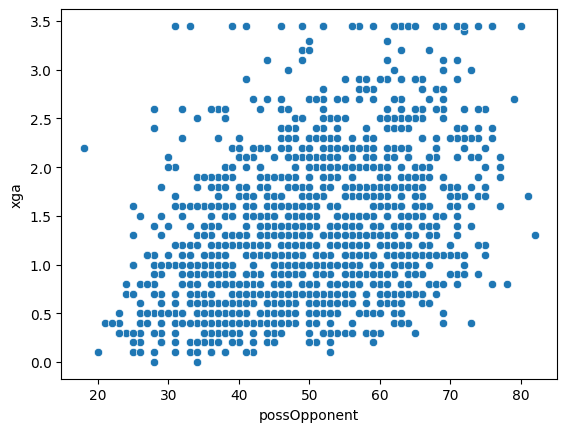

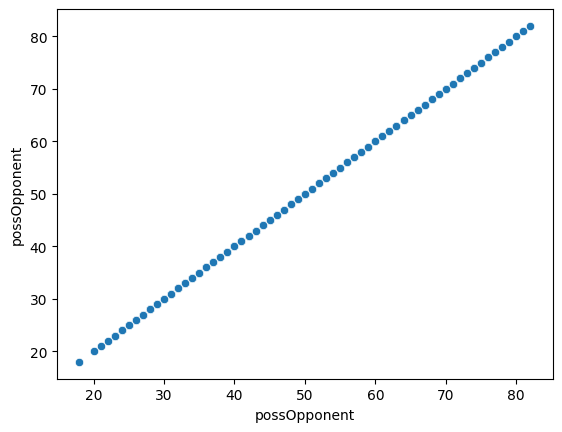

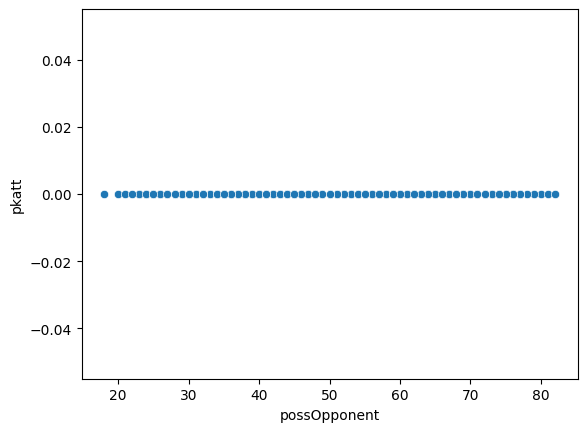

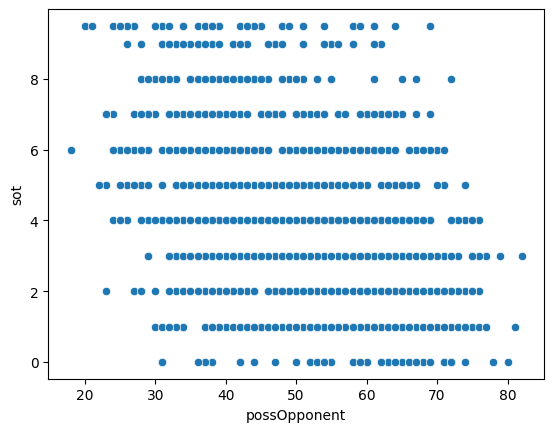

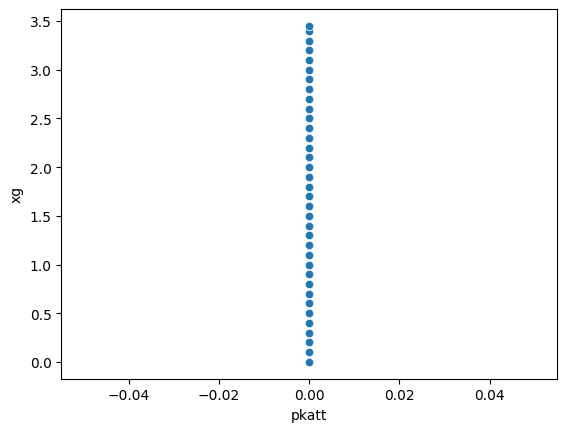

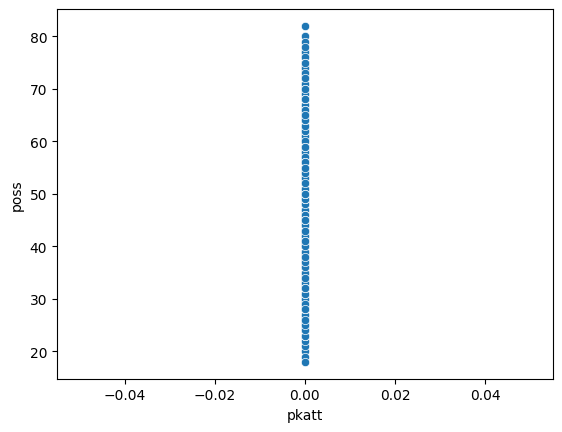

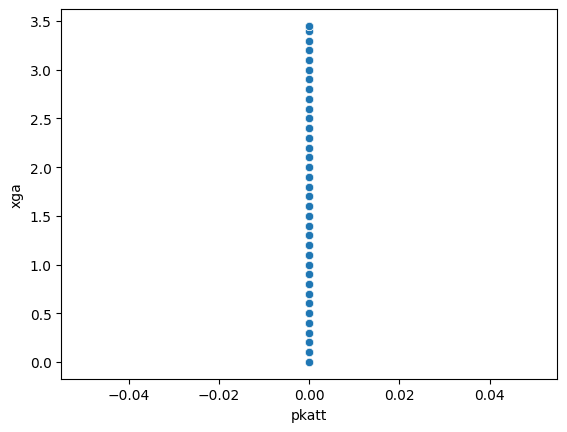

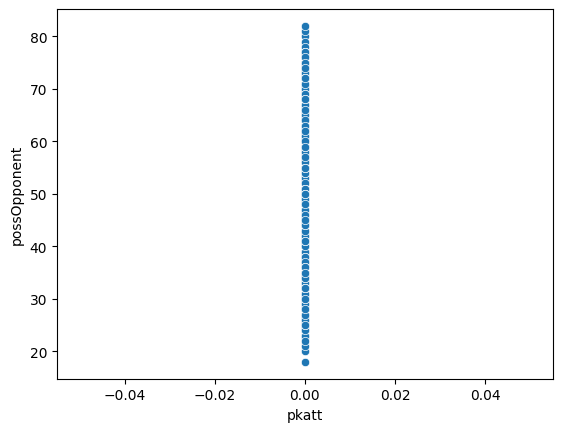

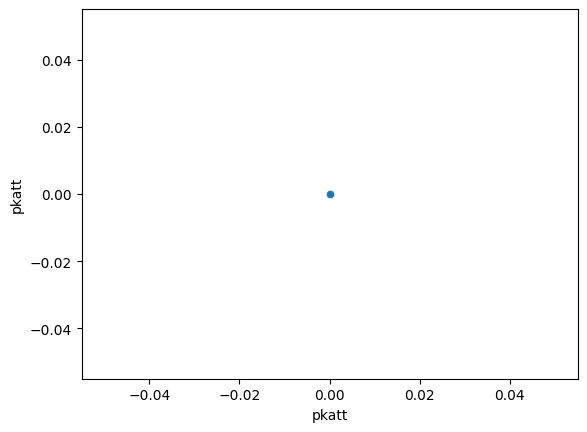

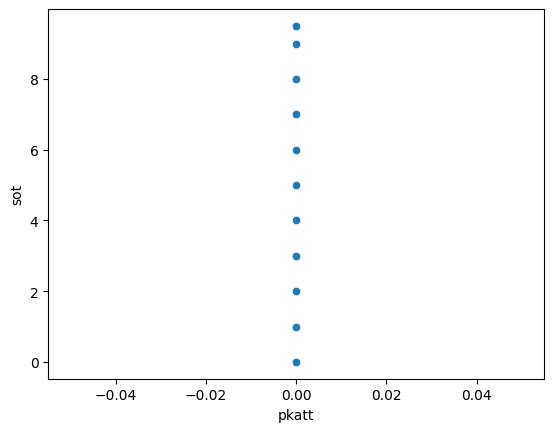

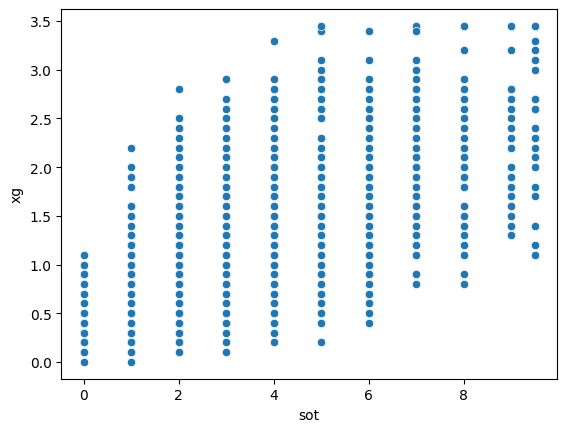

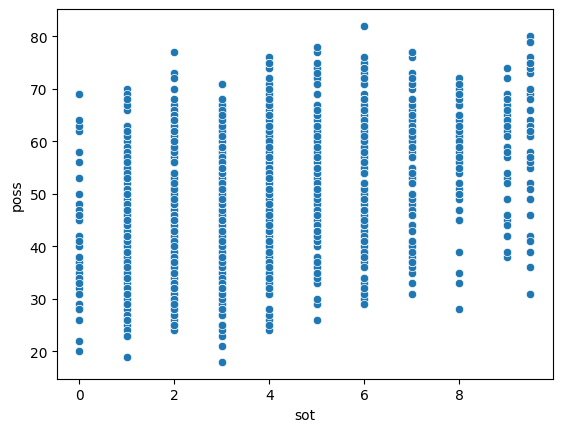

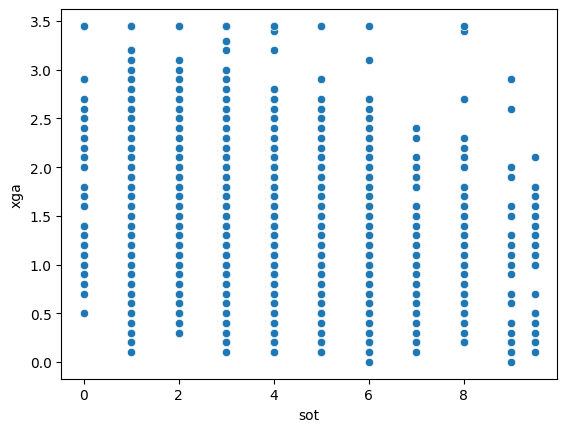

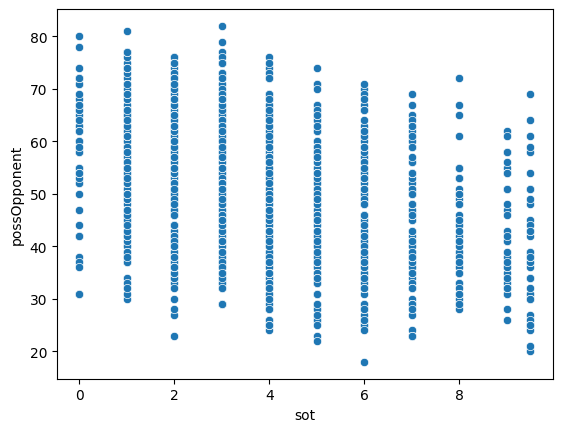

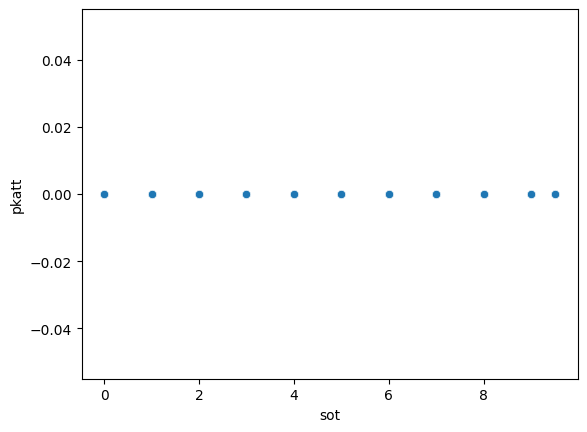

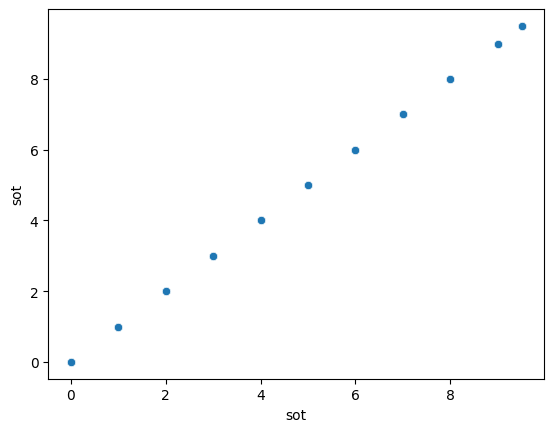

In [13]:
for xx in df1[c]:
    for yy in df1[c]:
        sns.scatterplot(df1,x=xx,y=yy)
        plt.show()


encoding categorical data

In [17]:
oh=OneHotEncoder()
cols=['team','venue','opponent']
ar=oh.fit_transform(df1[['team','venue','opponent']]).toarray()
oh.categories_

[array(['Arsenal', 'Aston Villa', 'Brentford', 'Brighton and Hove Albion',
        'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham',
        'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City',
        'Manchester United', 'Newcastle United', 'Norwich City',
        'Sheffield United', 'Southampton', 'Tottenham Hotspur', 'Watford',
        'West Bromwich Albion', 'West Ham United',
        'Wolverhampton Wanderers'], dtype=object),
 array(['Away', 'Home'], dtype=object),
 array(['Arsenal', 'Aston Villa', 'Brentford', 'Brighton', 'Burnley',
        'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United',
        'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd',
        'Newcastle Utd', 'Norwich City', 'Sheffield Utd', 'Southampton',
        'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wolves'],
       dtype=object)]

In [18]:
df2=pd.concat([df1,DataFrame(ar)],axis=1)
df2.drop(cols,axis=1,inplace=True)

In [26]:
y1=np.array(y)
oh1=OneHotEncoder()
r=DataFrame(oh1.fit_transform(y1.reshape(-1,1)).toarray())

In [25]:
x=df2.drop('result',axis=1)
y=df['result']

splitting into train and test data for our model

In [75]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y1,test_size=0.2,stratify=y1)

In [49]:
df2['result'].value_counts()

result
L    548
W    526
D    315
Name: count, dtype: int64

apply SMOTE for balanced samples of L,W,D

In [35]:
from imblearn.over_sampling import SMOTE
s=SMOTE(sampling_strategy='minority')


In [76]:
xtrain.columns=xtrain.columns.astype(str)
xtest.columns=xtest.columns.astype(str)

In [55]:
xsmote,ysmote=s.fit_resample(xtrain,ytrain)
ysmote.shape

(1297,)

Scaling our data

In [62]:
scaler=StandardScaler()
xsmote=scaler.fit_transform(xsmote)
#xtest=scaler.fit_transform(xtest)

In [63]:
xsmote.shape

(1297, 54)

creating our model

applying GridSearchCV for different parameters

In [102]:
gs=GridSearchCV(
    SVC(gamma='auto'),
    {
        "C":[0.01,0.1,1,10],
        "kernel":['linear','rbf']
    },
    cv=5
)
gs

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']})

fitting our data
Training the model

In [67]:
gs.fit(xsmote,ysmote)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']})

WITH SMOTE

In [69]:
print(f"models best parameters are {gs.best_params_}")
print(f"models accuracy score is {gs.best_score_}")

models best parameters are {'C': 1, 'kernel': 'rbf'}
models accuracy score is 0.6384526284526284


In [79]:
ypred=gs.predict(xtest)

Confusion Matrix

In [ ]:
print(confusion_matrix(ypred,ytest))

Classification Report

In [82]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           D       0.16      0.50      0.24        20
           L       0.76      0.66      0.71       127
           W       0.81      0.65      0.72       131

    accuracy                           0.64       278
   macro avg       0.58      0.60      0.56       278
weighted avg       0.74      0.64      0.68       278



WITHOUT SMOTE

In [105]:
gs.fit(xtrain,ytrain)
print(f"models best parameters are {gs.best_params_}")
print(f"models accuracy score is {gs.best_score_}")
ypred=gs.predict(xtest)

models best parameters are {'C': 0.1, 'kernel': 'linear'}
models accuracy score is 0.6444592574637418


In [93]:
#gs.score(xtrain,ytrain)

ClassificationReport

In [84]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           D       0.14      0.39      0.21        23
           L       0.74      0.64      0.69       126
           W       0.77      0.63      0.69       129

    accuracy                           0.62       278
   macro avg       0.55      0.55      0.53       278
weighted avg       0.70      0.62      0.65       278



ConfusionMatrix

In [85]:
print(confusion_matrix(ypred,ytest))

[[ 9  8  6]
 [27 81 18]
 [27 21 81]]


Applying PCA to reduce vars(6)

In [86]:
pca=PCA(n_components=6)
xtrainpca=pca.fit_transform(xtrain)
xtestpca=pca.fit_transform(xtest)

In [88]:
xtestpca.shape

(278, 6)

In [89]:
gs.fit(xtrainpca,ytrain)
print(f"models best parameters are {gs.best_params_}")
print(f"models accuracy score is {gs.best_score_}")
ypred=gs.predict(xtestpca)

models best parameters are {'C': 0.1, 'kernel': 'linear'}
models accuracy score is 0.6309659435219973


In [91]:
gs.score(xtrainpca,ytrain)

0.6363636363636364

ClassificationReport

In [94]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           D       0.02      0.33      0.03         3
           L       0.76      0.56      0.65       149
           W       0.70      0.59      0.64       126

    accuracy                           0.57       278
   macro avg       0.49      0.49      0.44       278
weighted avg       0.73      0.57      0.64       278



confusionMatrix

In [95]:
print(confusion_matrix(ypred,ytest))

[[ 1  1  1]
 [35 84 30]
 [27 25 74]]


APPLYING RFE(recursive Feature Elimination)

In [103]:
rfe=RFE(estimator=gs,n_features_to_select=3,step=1)

In [113]:
rf=RFE(estimator=SVC(C=1,kernel='linear'),n_features_to_select=8,step=1)
rf.fit(xtrain,ytrain)

RFE(estimator=SVC(C=1, kernel='linear'), n_features_to_select=8)

In [114]:
rf.score(xtrain,ytrain)

0.6147614761476148

In [115]:
xsel=rf.transform(xtrain)

In [118]:

yp=rf.predict(xtest)
yp.shape

(278,)

In [119]:
print(classification_report(yp,ytest))

              precision    recall  f1-score   support

           D       0.05      0.50      0.09         6
           L       0.75      0.60      0.67       139
           W       0.75      0.59      0.66       133

    accuracy                           0.59       278
   macro avg       0.52      0.56      0.47       278
weighted avg       0.74      0.59      0.65       278



LOGISTIC REGRESSION

In [134]:

from sklearn.linear_model import LogisticRegression
rfee=RFE(estimator=LogisticRegression(solver='lbfgs',max_iter=1000000),n_features_to_select=40,step=1)

In [135]:
rfee.fit(xtrain,ytrain)

RFE(estimator=LogisticRegression(max_iter=1000000), n_features_to_select=40)

In [123]:
rfee.support_

array([ True, False,  True, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False])

In [124]:
rfee.ranking_

array([ 1, 40,  1, 43, 45, 29,  4, 10, 16,  1, 24, 30, 31, 14,  1, 35,  6,
       38,  7,  8, 36, 17,  1, 32,  5,  1, 33, 11, 12, 44, 41, 20, 34,  2,
        1, 25, 37, 27, 15,  1, 39, 21,  9, 19, 13, 26,  3,  1, 28, 22,  1,
       23, 42, 18])

In [133]:
n=rfee.transform(xtrain)
ypr=rfee.predict(xtest)
print(classification_report(ypr,ytest))

              precision    recall  f1-score   support

           D       0.13      0.50      0.20        16
           L       0.74      0.60      0.66       134
           W       0.74      0.61      0.67       128

    accuracy                           0.60       278
   macro avg       0.54      0.57      0.51       278
weighted avg       0.70      0.60      0.64       278



In [126]:
rfee.predict(xtrain)

array(['L', 'L', 'L', ..., 'L', 'W', 'L'], dtype=object)

In [136]:
rfee.score(xtrain,ytrain)

0.6435643564356436

In [280]:
from sklearn.feature_selection import SelectKBest,f_classif

In [143]:
md=LogisticRegression(solver='lbfgs',max_iter=100000)
md.fit(xsmote,ysmote)
md.score(xsmote,ysmote)

0.676946800308404

In [144]:
md=LogisticRegression(solver='lbfgs',max_iter=100000)
md.fit(xtrainpca,ytrain)
md.score(xtrainpca,ytrain)

0.6336633663366337

In [141]:
md.fit(xtrain,ytrain)

LogisticRegression(max_iter=100000)

In [142]:
md.score(xtrain,ytrain)

0.6858685868586859

GENERALLY LOGISTIC REGRESSION HAS SLIGHTLY HIGHER ACCURACY THAN SVM

In [146]:
from sklearn.feature_selection import SelectKBest,f_classif

In [168]:
best=SelectKBest(score_func=f_classif,k=7)

In [169]:
best.fit(xtrain,ytrain)

C:\Users\Alpha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Alpha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest(k=7)

In [156]:
from numpy import set_printoptions

In [157]:
set_printoptions(precision=2)

In [158]:
best.scores_

array([1.44e+02, 1.09e+01, 1.67e+02, 1.09e+01,      nan, 1.32e+02,
       2.96e+00, 5.31e-01, 6.80e-01, 6.23e+00, 3.01e+00, 3.85e+00,
       1.29e+00, 2.89e-01, 4.24e+00, 4.18e-02, 1.52e+00, 1.54e+00,
       1.96e+01, 3.85e+00, 7.33e-01, 4.40e+00, 1.20e+01, 1.12e+00,
       1.94e+00, 4.94e+00, 4.25e+00, 1.64e+00, 5.26e-01, 5.99e-01,
       5.99e-01, 3.10e+00, 1.27e-01, 7.21e-01, 5.11e+00, 2.27e+00,
       5.92e+00, 1.32e+00, 1.30e+00, 3.95e+00, 1.21e-02, 4.01e-01,
       7.11e+00, 1.55e+01, 2.14e+00, 1.09e+00, 5.88e+00, 1.34e+01,
       1.50e+00, 1.43e+00, 4.96e+00, 3.20e+00, 1.49e+00, 4.20e-01])

In [161]:
md=LogisticRegression(solver='lbfgs',max_iter=100000)

In [170]:
f=best.transform(xtrain)
f1=best.transform(xtest)

In [171]:
md.fit(f,ytrain)
yy=md.predict(f1)
print(classification_report(yy,ytest))

              precision    recall  f1-score   support

           D       0.05      0.60      0.09         5
           L       0.71      0.59      0.64       132
           W       0.79      0.59      0.67       141

    accuracy                           0.59       278
   macro avg       0.52      0.59      0.47       278
weighted avg       0.74      0.59      0.65       278



In [172]:
md.score(f,ytrain)

0.6174617461746175